In [1]:
from fastai.vision import *

In [2]:
folder = 'rahul'
file = 'downloadR.csv'


In [3]:
path = Path('aaa')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('aaa/rahul'),
 PosixPath('aaa/downloadR.csv'),
 PosixPath('aaa/downloadM.csv')]

In [5]:
download_images(path/file, dest, max_pics=200)


Error https://rstv.nic.in/wp-content/uploads/2017/11/Rahul-Gandhi-gen.jpg HTTPSConnectionPool(host='rstv.nic.in', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/Rahul-Gandhi-gen.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://ipanewspack.com/wp-content/uploads/2017/10/rahul.jpg HTTPSConnectionPool(host='ipanewspack.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/10/rahul.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f296e02bac8>, 'Connection to ipanewspack.com timed out. (connect timeout=4)'))
Error https://www.washingtonpost.com/resizer/uN1FNwbATjvaIIPXsUkHZFEb7eM=/1024x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/YEXODPKSYY6ALOW3LLZEICCXYM.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [6]:
folder = 'modi'
file = 'downloadM.csv'

In [7]:
path = Path('aaa')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('aaa/rahul'),
 PosixPath('aaa/modi'),
 PosixPath('aaa/downloadR.csv'),
 PosixPath('aaa/downloadM.csv')]

In [9]:
download_images(path/file, dest, max_pics=200)


Error https://rstv.nic.in/wp-content/uploads/2018/02/PM-Modi-India-S-Korea-biz-summit-2.jpg HTTPSConnectionPool(host='rstv.nic.in', port=443): Max retries exceeded with url: /wp-content/uploads/2018/02/PM-Modi-India-S-Korea-biz-summit-2.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.time8.in/wp-content/uploads/2019/02/Prime-Minister-Narendra-Modi-1-770x433.jpg HTTPSConnectionPool(host='www.time8.in', port=443): Max retries exceeded with url: /wp-content/uploads/2019/02/Prime-Minister-Narendra-Modi-1-770x433.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f296e4aea90>, 'Connection to www.time8.in timed out. (connect timeout=4)'))
Error https://rstv.nic.in/wp-content/uploads/2018/07/PM-Narendra-Modi.png HTTPSConnectionPool(host='rstv.nic.in', port=443): Max retries exceeded with url: /wp-content/uploads/2018/07/PM-Narendra-Modi.png (

In [10]:
classes = ['rahul','modi']

In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

rahul


Image aaa/rahul/00000028.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='aaa/rahul/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='aaa/rahul/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='aaa/rahul/00000182.png'>
modi


cannot identify image file <_io.BufferedReader name='aaa/modi/00000047.jpg'>
Image aaa/modi/00000031.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='aaa/modi/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='aaa/modi/00000158.jpg'>


In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['modi', 'rahul']

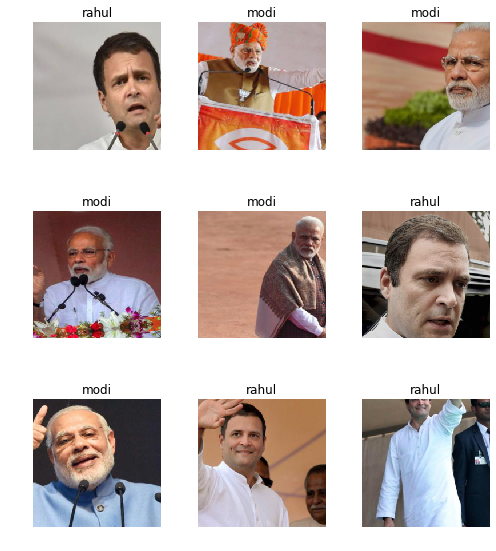

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['modi', 'rahul'], 2, 308, 76)

In [33]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 21519072.04it/s]


In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.535936,0.346340,0.131579
2,0.403436,0.432013,0.118421
3,0.305945,0.284831,0.078947
4,0.261399,0.209531,0.065789


In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.176870,0.170371,0.039474
2,0.146776,0.162631,0.026316
3,0.120084,0.187551,0.039474
4,0.116977,0.198414,0.052632


In [36]:
learn.save('stage-1')

In [37]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


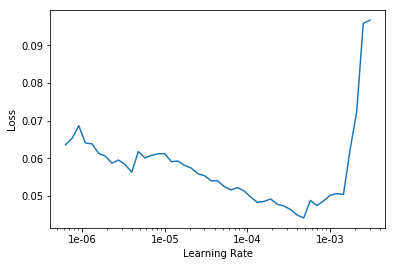

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.084883,0.238347,0.039474
2,0.074511,0.236808,0.052632


In [41]:
learn.save('stage-2')

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

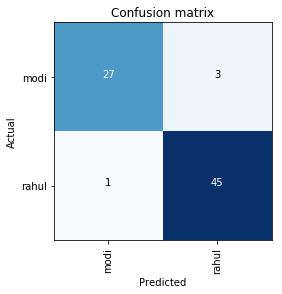

In [43]:
interp.plot_confusion_matrix()

In [46]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

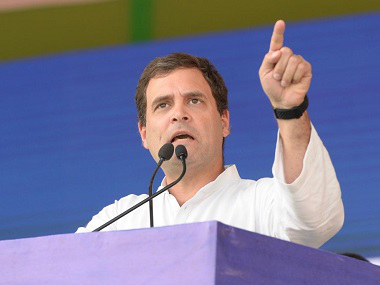

In [50]:
img = open_image(path/'rahul'/'00000021.jpg')
img

In [57]:
classes = ['rahul','modi']
data2 = ImageDataBunch.single_from_classes(path, classes, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (308 items)
[Category rahul, Category rahul, Category rahul, Category rahul, Category rahul]...
Path: aaa
x: ImageItemList (308 items)
[Image (3, 307, 500), Image (3, 279, 500), Image (3, 365, 500), Image (3, 280, 499), Image (3, 250, 444)]...
Path: aaa;

Valid: LabelList
y: CategoryList (76 items)
[Category modi, Category modi, Category modi, Category modi, Category rahul]...
Path: aaa
x: ImageItemList (76 items)
[Image (3, 230, 409), Image (3, 262, 500), Image (3, 426, 500), Image (3, 281, 500), Image (3, 248, 444)]...
Path: aaa;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d

In [58]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category rahul

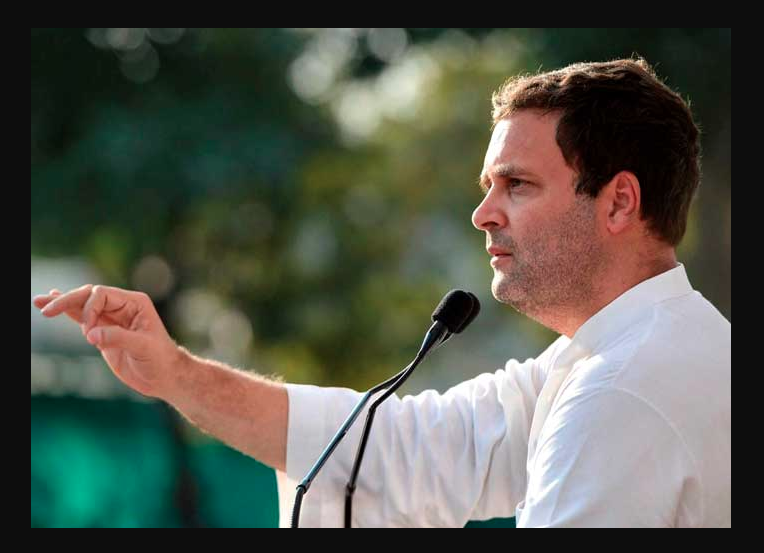

In [60]:
img = open_image(path/'aaa.png')
img

In [61]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category rahul

In [62]:
#urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
#window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));